# Results

## Overview

This is a summary report of the data that was queried from the Smithsonian Open API Access by running the function `create_smithsonian_csv()` with `"feminism"` as a search filter.

In [8]:
# import libraries
import requests
import json
import csv
import time
import pandas as pd

In [10]:
api_key = "api_key=ENTER API KEY HERE"

In [33]:
create_smithsonian_csv("feminism")

200
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
Querying database...
File finished.


In [2]:
# read data into environment
df = pd.read_csv('feminism_smithsonian_data.csv')

In [3]:
# replace NaN values in data with blank
df = df.replace(np.nan, '', regex = True)

In [14]:
# rename headers
df.columns = ['id', 'title', 'object_type', 'physical_description', 'decade', 'data_source', 'record_link']

#### Glimpse of the data:

In [25]:
df.head(10)

,id,title,object_type,physical_description,decade,data_source,record_link
0,edanmdm-siris_sil_1107788,Feminism for the Americas : the making of an i...,Books,354 pages : illustrations ; 25 cm,"1920s, 1910s, 2010s, 1940s, 1930s, 1900s, 1990...",Smithsonian Libraries,https://siris-libraries.si.edu/ipac20/ipac.jsp...
1,edanmdm-siris_sil_1108974,Republican women : feminism and conservatism f...,Books,"xi, 338 pages : illustrations ; 25 cm",2000s,Smithsonian Libraries,https://siris-libraries.si.edu/ipac20/ipac.jsp...
2,edanmdm-siris_sil_1118383,A companion to feminist art edited by Hilary R...,Electronic information resources,1 online resource (589 pages),2010s,Smithsonian Libraries,https://siris-libraries.si.edu/ipac20/ipac.jsp...
3,edanmdm-siris_sil_1145254,"Curating differently feminisms, exhibitions an...","E-books, Electronic information resources","1 online resource (191 pages) illustrations, p...",2010s,Smithsonian Libraries,https://siris-libraries.si.edu/ipac20/ipac.jsp...
4,edanmdm-siris_sil_1106801,The art of feminism : images that shaped the f...,Texts,272 pages : illustrations (some color) ; 29 cm,2010s,Smithsonian Libraries,https://siris-libraries.si.edu/ipac20/ipac.jsp...
5,edanmdm-siris_sil_1117365,"Wet : on painting, feminism, and art culture p...",Papers (document genres),,1990s,Smithsonian Libraries,https://siris-libraries.si.edu/ipac20/ipac.jsp...
6,edanmdm-nmah_809576,Fatti Maschii Parole Femine,Prints,,,National Museum of American History,
7,edanmdm-nmah_1967893,The Deadly Nightshade,Posters,overall: 17 in x 17 1/2 in; 43.18 cm x 44.45 cm,,National Museum of American History,
8,edanmdm-siris_sil_1145380,Chicana power! : contested histories of gender...,"E-books, Electronic information resources","1 online resource (x, 300 pages) : illustrations",2010s,Smithsonian Libraries,https://siris-libraries.si.edu/ipac20/ipac.jsp...
9,edanmdm-siris_sil_1104996,Chicana movidas : new narratives of activism a...,Books,"x, 467 pages, 8 unnumbered pages of plates : i...","1920s, 1910s, 2010s, 1940s, 1930s, 1900s, 1990...",Smithsonian Libraries,https://siris-libraries.si.edu/ipac20/ipac.jsp...


#### Sources of Data

In [16]:
df['data_source'].explode().value_counts()

National Museum of American History                        55
Smithsonian Libraries                                      54
Archives of American Art                                   50
National Museum of African American History and Culture     9
Smithsonian Institution Archives                            3
NMNH - Botany Dept.                                         1
NMNH - Vertebrate Zoology - Fishes Division                 1
Name: data_source, dtype: int64

<AxesSubplot:ylabel='data_source'>

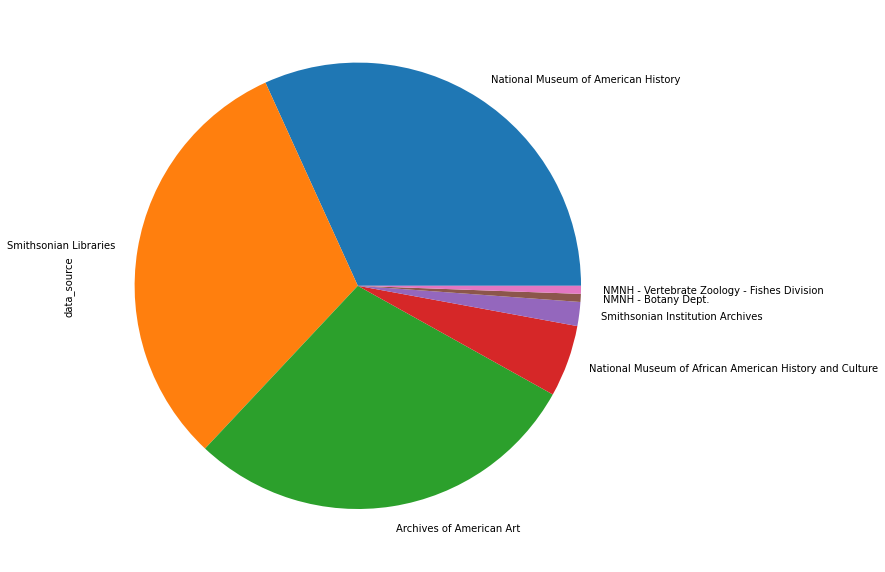

In [29]:
df['data_source'].explode().value_counts().plot.pie(figsize=(10,20))

#### Types of Objects

In [26]:
smithsonian_inventory = df.assign(object_type=df.object_type.str.split(",")).explode('object_type')

In [27]:
smithsonian_inventory['object_type'].explode().value_counts()

Archival materials          48
 Interviews                 38
 Sound recordings           35
Books                       26
 Collection descriptions    23
                            ..
Key Chain                    1
form                         1
 order                       1
Articles                     1
                             1
Name: object_type, Length: 84, dtype: int64

<AxesSubplot:>

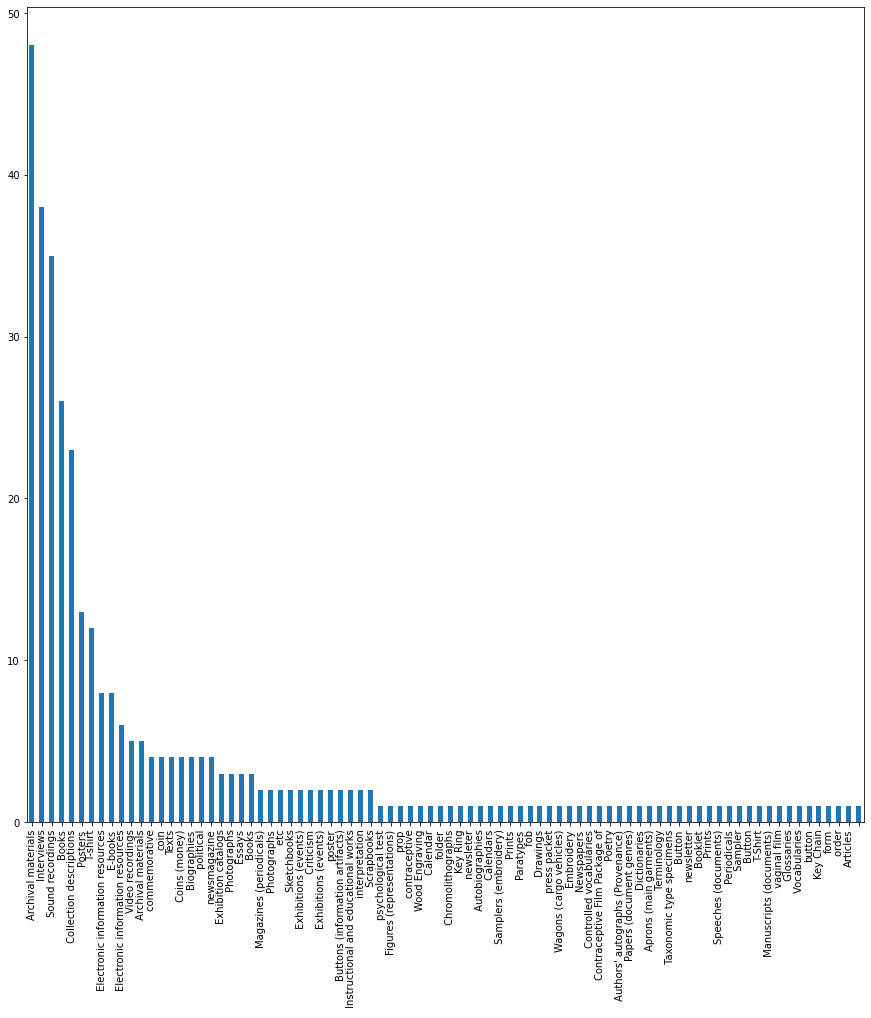

In [28]:
smithsonian_inventory['object_type'].explode().value_counts().plot.bar(figsize=(15,15))